# Project One - ME249 F22

### Joshua Duarte and Pavan Reddy

## Background Information  
Boiling heat transfer can be a useful, efficient heat transfer process in two-phase loops used for thermal management  
systems in terrestrial and aerospace applications.  It is centrally important in, for example, Rankine cycle boiling and  
air-conditioning evaporators.  In terrestrial applications, gravity buoyancy is a important mechanism that moves vapor  
away from the surface, allowing liquid to replace it to sustain the process.  In microgravity or zero gravity, this  
mechanism is eliminated, and vapor tends to accumulate near the surface. If the surface is partially or fully blanketed  
with a vapor layer (transition or film boiling) the heat transfer rate can become so low that the system performance may be   
unacceptably low and/or the accumulation of heat may raise the wall temperature to a level that damages equipment.   
Boiling vaporization of cryogenic fuels and liquid oxygen is also a concern during transfer into and out of storage  
tanks during space missions.  Note that high g levels can be encountered during acceleration of a vehicle, and very  
low g levels result during travel in deep space or in orbit.  
  
Boiling in high or low gravity conditions is important to space power, propulsion and thermal management systems.   
NASA has test facilities in the International Space Station to study boiling processes.  They have also studied  
boiling in parabolic flight aircraft, rockets, and drop towers to achieve reduced gravity. The nucleate boiling  
data used here was obtained aboard the “vomit comet” NASA aircraft (see photos in Fig. 1) for boiling of a  
water/2-propanol mixture.   

## Parameters and Notes
* NGEN: this is the number of generations. With worse initial guesses, you need more generations.
* MFRAC: this affects the error threshold for keeping an organism. With worse initial guesses, you need to keep organisms with higher error or you will get stuck in a local minimum (think of a local error minimum as a valley - if the error threshold is too low, the organisms get thrown out too early on their way up the hill and can't make it out of the valley)
* Perturbation coefficients: these are the 0.001 and 0.01 coefficients in the initial population array which define the range of initial guesses over the population. With worse initial guesses, you need to start your algorithm with a wider range of values so you are searching for solutions over a wider domain. 
* Mutation rate: this is in the body of the code and is hard coded to be 0.09 (or 9%). With worse initial guesses, you may need to have a higher mutation rate to search over a larger solution domain.  However, it is helpful to decrease the mutation rate as you hone in on the solution to fine tune the final constants.  Too large of a mutation rate will result in noise that you can see in the output plots for the constants.
* Note that changing one of the above parameters will affect the others - this takes practice and observation of how the evolution of the constants changes as you change the parameters.



## Nomenclature

*c<sub>p,l</sub>* &emsp;&emsp;&emsp; Liquid specific heat  
*g* &emsp;&emsp;&emsp;&emsp;&nbsp; Gravitational acceleration, m/s<sup>2</sup>  
*g<sub>en</sub>* &emsp;&emsp;&emsp;&emsp;Earth-normal gravitational acceleration, 9.8 m/s<sup>2</sup>  
*h<sub>lv</sub>* &emsp;&emsp;&emsp;&emsp;Latent heat of vaporization, kJ/kg  
*k<sub>l</sub>* &emsp;&emsp;&emsp;&emsp;&nbsp;Liquid thermal conductivity, W/mK  
*l<sub>h</sub>* &emsp;&emsp;&emsp;&emsp;&nbsp;Heated surface characteristic size, m  
*q''* &emsp; &emsp;&emsp;&nbsp;Heat flux, W/cm<sup>2</sup>   
*q''<sub>en</sub>* &emsp;&emsp;&nbsp; Heat flux under earth-normal gravity  
*Pr<sub>l</sub>* &emsp; &emsp;&emsp; Liquid Prandtl number  
*T<sub>sat</sub>*&emsp;&emsp;&emsp;&nbsp;&nbsp;Saturation temperature, °C  
*T<sub>w</sub>-T<sub>sat</sub>* &emsp;&nbsp; Wall superheat, °C  
*$\hat{x}$<sub>1,b</sub>* &emsp;&emsp;&emsp; Bulk mole fraction of 2-propanol in water/2-propanol solution    
*$\hat{x}$<sub>1,i</sub>* &emsp;&emsp;&emsp; Interface mole fraction of 2-propanol in water/2-propanol solution  
*$\alpha$<sub>l</sub>* &emsp;&emsp;&emsp;&nbsp;&nbsp; Liquid thermal diffusivity  
*$\gamma$* &emsp; &emsp;&emsp;&emsp; Surface tension parameter  
*$\mu$<sub>l</sub>*  &emsp;&emsp;&emsp;&nbsp;&nbsp; Liquid viscosity  
*$\rho$<sub>l</sub>* &emsp;&emsp;&emsp;&nbsp;&nbsp; Liquid density, kg/m<sup>3</sup>  
*$\rho$<sub>v</sub>* &emsp;&emsp;&emsp;&nbsp;&nbsp; Vapor density, kg/m<sup>3</sup>  
*$\sigma$* &emsp; &emsp;&emsp;&emsp; Surface tension, N/m  


-------------------------------------

## Task 1.A 
### Install this code into a first cell of a new Anaconda notebook. Run the code, which will simply print 
### the array and a single array element in the output region below the cell.  Inspect the output to confirm it 
### matches the array in the Appendix on the last page of this write-up.  Note that in this code I have commented-out 
### portions of the data with pressures other than 5.5 kPa. More on that in the next task.



In [2]:
'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 45 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 45 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])
'''
ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])
'''
ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])
'''
ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])
'''
# print the data array
print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21
%store ydata

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5], [47.4, 33.2, 0.098, 1.79, 5.5], [49.4, 34.2, 0.098, 1.79, 5.5], [59.2, 34.8, 0.098, 1.79, 5.5], [67.8, 36.3, 0.098, 1.79, 5.5], [73.6, 37.3, 0.098, 1.79, 5.5], [76.3, 37.8, 0.098, 1.79, 5.5], [85.3, 39.2, 0.098, 1.79, 5.5], [96.5, 39.3, 0.098, 1.79, 5.5], [111.0, 42.3, 0.098, 1.79, 5.5], [124.0, 43.5, 0.098, 1.79, 5.5], [136.2, 45.4, 0.098, 1.79, 5.5], [143.5, 46.7, 0.098, 1.79, 5.5], [154.6, 47.9, 0.098, 1.79, 5.5], [163.1, 48.6, 0.098, 1.79, 5.5], [172.8, 50.9, 0.098, 1.79, 5.5], [184.2, 51.7, 0.098, 1.79, 5.5], [203.7, 56.4, 0.098, 1.79, 5.5], [36.7, 30.2, 9.8, 1.79, 5.5], [55.1, 34.1, 9.8, 1.79, 5.5], [67.5, 35.3, 9.8, 1.79, 5.5], [78.0, 37.8, 9.8, 1.79, 5.5], [92.0, 38.1, 9.8, 1.79, 5.5], [120.0, 44.1, 9.8, 1.79, 5.5], [134.3, 46.9, 9.8, 1.79, 5.5], [150.3, 48.5, 9.8, 1.79, 5.5], [167.0, 49.2, 9.8, 1.79, 5.5], [184.0, 52.7, 9.8, 1.79, 5.5], [196.5, 53.1, 9.8, 1.79, 5.5], [42.4, 29.7, 19.6, 1.79, 5.5], [48.7, 31.0, 19.6, 1.79, 5.5], [54.5, 3

---------------------------------
## Task 1.B 
### Using the data in the first two groups in the Appendix listing (for g = 0.098 and 9.8 m/s<sup>2</sup>) make a log-log
### plot of heat flux versus wall superheat for these two gravity levels to get a sense of how strongly heat flux
### varies with gravity and superheat. You can do this using a separate Python program (recommended) or you
### can use another platform such as Excel or Matlab if you prefer. A log-log plot is done in the second python
### code file so you can see an example there.

[44.1, 47.4, 49.4, 59.2, 67.8, 73.6, 76.3, 85.3, 96.5, 111.0, 124.0, 136.2, 143.5, 154.6, 163.1, 172.8, 184.2, 203.7]
[32.5, 33.2, 34.2, 34.8, 36.3, 37.3, 37.8, 39.2, 39.3, 42.3, 43.5, 45.4, 46.7, 47.9, 48.6, 50.9, 51.7, 56.4]


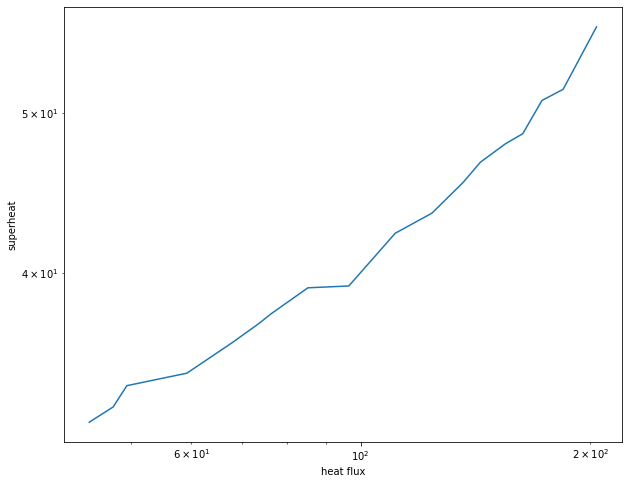

In [3]:
%store -r ydata
import matplotlib.pyplot as plt
import numpy as np
arrdata=np.array(ydata)
i=0
hf=[]
sh=[]
for i in range(ND):
    if arrdata[i,2]==0.098:
        hf.append(arrdata[i,0])
        sh.append(arrdata[i,1])
print(hf)
print(sh)
plt.plot(hf,sh)
plt.xlabel('heat flux')
plt.ylabel('superheat')
plt.loglog()
plt.show()


[36.7, 55.1, 67.5, 78.0, 92.0, 120.0, 134.3, 150.3, 167.0, 184.0, 196.5]
[30.2, 34.1, 35.3, 37.8, 38.1, 44.1, 46.9, 48.5, 49.2, 52.7, 53.1]


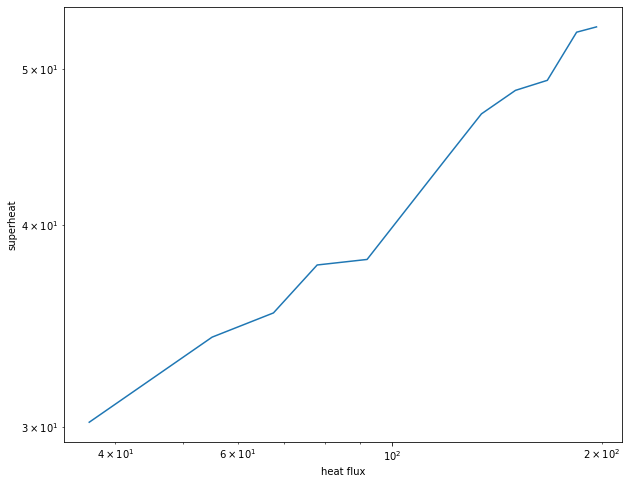

In [3]:
%store -r ydata
import matplotlib.pyplot as plt
import numpy as np
arrdata=np.array(ydata)
i=0
hf=[]
sh=[]
for i in range(ND):
    if arrdata[i,2]==9.8:
        hf.append(arrdata[i,0])
        sh.append(arrdata[i,1])
print(hf)
print(sh)
plt.plot(hf,sh)
plt.xlabel('heat flux')
plt.ylabel('superheat')
plt.loglog()
plt.show()



---------------------------------
## Task 2
### Using constants n1,n2 ,n3 for your best fit to the data, construct a log-log plot with the measured heat flux
### values as the vertical axis and predicted heat flux values for Eq. (1) with your best fit constants for the
### horizontal axis. Be sure to plot the combinations of ( qʹʹ pred , qʹʹ exp ) as discrete points. 
### Note that if the fit were perfect, the points would all lie along a line with a slope of 1 on the log-log plot. 
### Also, determine the rms deviation of the qʹʹ### exp data from the qʹʹpred predictions. If the uncertainty 
### in the measured heat flux data is estimated to be ±10%. Is your fit tighter than the uncertainty 
### (is the average deviation less than the uncertainty)? Assess your fit in the context of this question. 
### Specifically, would you say your fit rms deviation is comparable to the noise in the data, or above or 
### below it? Discuss how this assessment affects the accuracy of predicted trends and accuracy of predictions 
### for this fitted relation.

In [14]:
NGEN = 6000 # number of generations (steps)
MFRAC = 0.5 # faction of median threshold
MR = 0.09 # mutation rate

'''Pertubation Constants'''
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

'''guesses for initial solution population'''
n0i = -1.0
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215
n5i = 0.145





ENDING: pop. avg n1-n3,aFerrmean: 0.00037853078236992934 3.3953049818862735 0.06172178768628482 0.03187690561222167
MINUMUM: avg n1-n3,aFerrmeanMin: 0.0005103909679041828 3.306062377264578 0.060951502824902686 0.030384274050977458
TIME AVG: avg n1-n3,aFerrmean: 0.00036831379665842076 3.3967335086998505 0.06215001603253525 0.03619893520666217


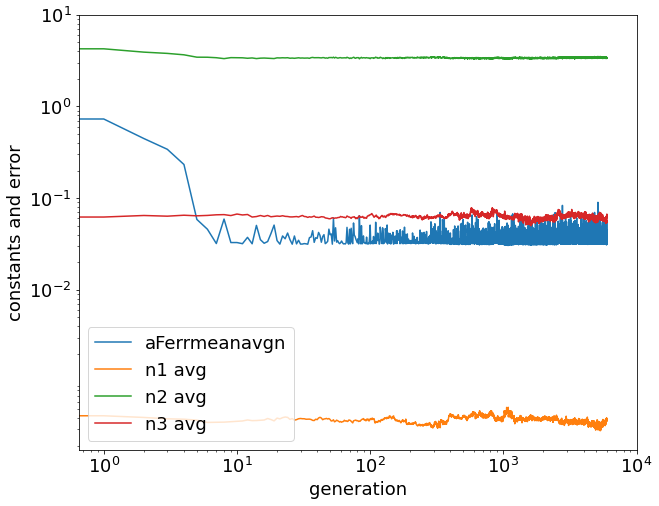

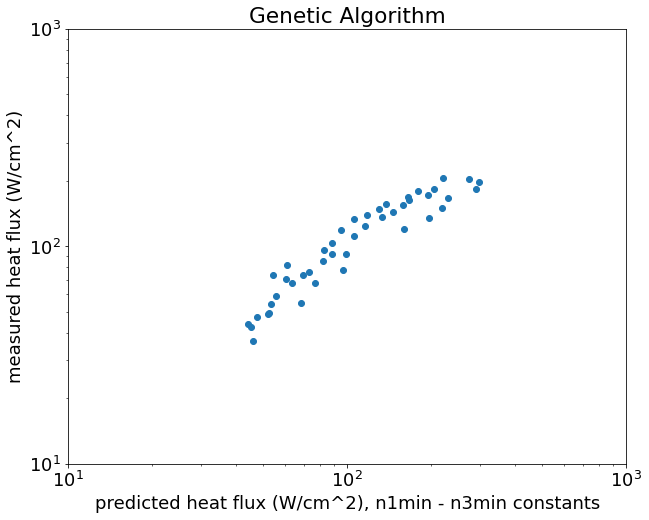

In [15]:

'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 45 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 45 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])
'''
ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])
'''
ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])
'''
ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])
'''
# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]
#set program parameters

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()]]
for i in range(ND):
    n.append([-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    for i in range(ND):

        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] )

        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+MR*2.*(0.5-numpy.random.rand()))
        '''
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+MR*2.*(0.5-numpy.random.rand()))
        '''
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] )

        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min)
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 


## First Change to n<sub>1</sub>, n<sub>2</sub>, n<sub>3</sub>

#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063
#### First Change: n<sub>1</sub> = 0.00029 | n<sub>2</sub> = 4.1 | n<sub>1</sub> = 0.067


In [24]:
''' Initial Given Values
#Program Parameters
NGEN = 6000 # number of generations (steps)
MFRAC = 0.5 # faction of median threshold
MR = 0.09 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

#guesses for initial solution population
n0i = -1.0
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215
n5i = 0.145
'''

''' New Parameters 1 '''
#set program parameters
NGEN = 6000 #number of generations (steps)
MFRAC = 0.8 # fraction of median threshold
MR = 0.25 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

# First Different Initial guesses for initial solution population 
n0i = -1.0
n1i = 0.029 #Different 
n2i = 4.6  #Different
n3i = 0.03 #Different
n4i = 1.215
n5i = 0.145



Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063
ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876
MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072
TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075

Values from different initial guesses 1- where n1 =  0.029 , n2 =  4.6 , and n3 =  0.03
ENDING: pop. avg n1-n3,aFerrmean: 0.004193250082574708 2.907639434615974 0.0243719277240718 0.14205435277098385
MINUMUM: avg n1-n3,aFerrmeanMin: 0.003501564303392375 2.77217516248626 0.028363979153723507 0.02993876351566343
TIME AVG: avg n1-n3,aFerrmean: 0.009759028750710866 2.586771445061164 0.020851233550075003 0.059530249376642454 

Initial aFerrmeanMin Value: 0.030753880388892072
New aFerrmeanMin Value: 0.02993876351566343


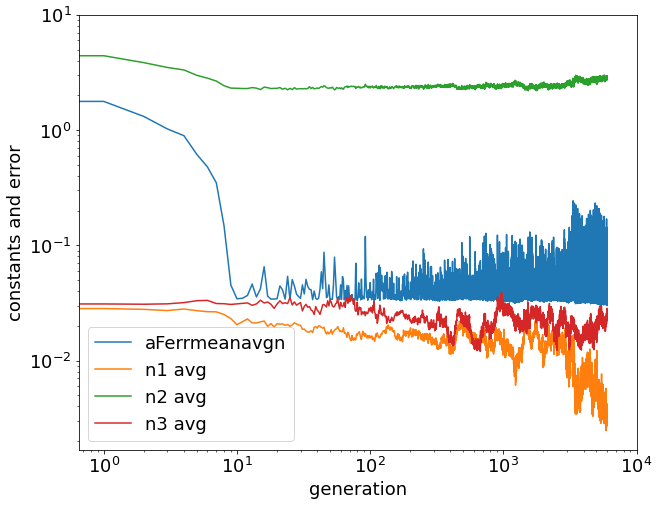

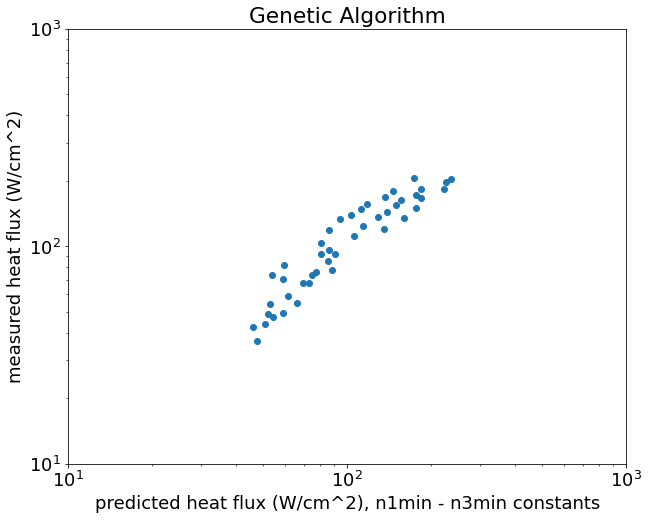

In [25]:

'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 45 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 45 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])
'''
ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])
'''
ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])
'''
ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])
'''
# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)



#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()]]
for i in range(ND):
    n.append([-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    for i in range(ND):

        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] )

        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+MR*2.*(0.5-numpy.random.rand()))
        '''
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))
        '''
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] )

        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063' )
print('ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876')
print('MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072')
print('TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075\n')

print('Values from different initial guesses 1- where n1 = ', n1i, ', n2 = ', n2i, ', and n3 = ', n3i)
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta, '\n')

# compare minimum aFerrMeanMin
print('Initial aFerrmeanMin Value: 0.030753880388892072')
print('New aFerrmeanMin Value:', aFerrmeanavgnMin)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min)
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 


## Discussion regarding results from first change:

#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063
#### First Change: n<sub>1</sub> = 0.00029 | n<sub>2</sub> = 4.1 | n<sub>1</sub> = 0.067



---------------------------------
## Second Change to n<sub>1</sub>, n<sub>2</sub>, n<sub>3</sub>

#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063
#### Second Change Change: n<sub>1</sub> = 0.00024 | n<sub>2</sub> = 3.8 | n<sub>1</sub> = 0.059


In [22]:
''' Initial Given Values
#Program Parameters
NGEN = 6000 # number of generations (steps)
MFRAC = 0.5 # faction of median threshold
MR = 0.09 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

#guesses for initial solution population
n0i = -1.0
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215
n5i = 0.145
'''

''' New Parameters 1 '''
#set program parameters
NGEN = 6000 #number of generations (steps)
MFRAC = 0.4 # fraction of median threshold
MR = 0.06 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

# First Different Initial guesses for initial solution population 
n0i = -1.0
n1i = 0.029 #Different 
n2i = 4.6  #Different
n3i = 0.03 #Different
n4i = 1.215
n5i = 0.145



Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063
ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876
MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072
TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075

Values from different initial guesses 2- where n1 =  0.029 , n2 =  4.6 , and n3 =  0.03
ENDING: pop. avg n1-n3,aFerrmean: 0.005290657115373866 2.7309927338258784 0.008623217892234842 0.05644850839087285
MINUMUM: avg n1-n3,aFerrmeanMin: 0.002999399780032716 2.8144603654177724 0.020034890845128692 0.030854368919754672
TIME AVG: avg n1-n3,aFerrmean: 0.006418700539212384 2.776525672766348 0.011989833423524405 0.09549929702452366 

Initial aFerrmeanMin Value: 0.030753880388892072
New aFerrmeanMin Value 2: 0.030854368919754672


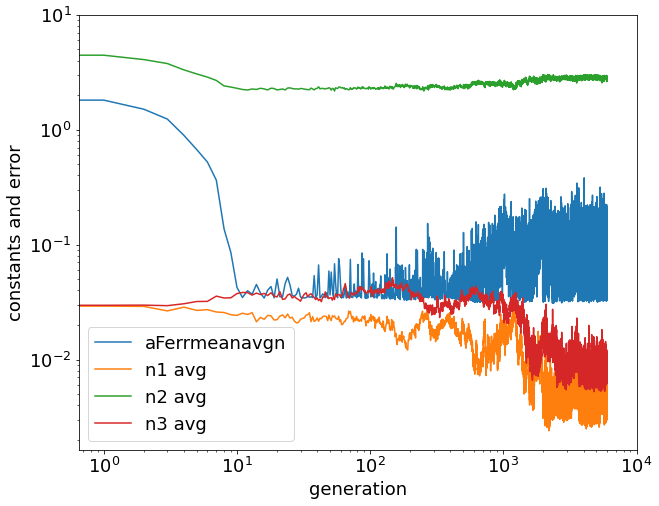

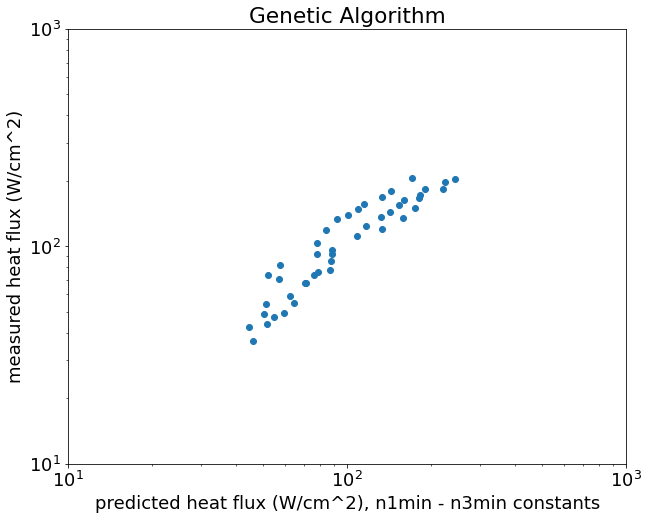

In [26]:

'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 45 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 45 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])
'''
ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])
'''
ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])
'''
ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])
'''
# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]
#set program parameters
# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)



#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()]]
for i in range(ND):
    n.append([-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    for i in range(ND):

        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] )

        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+MR*2.*(0.5-numpy.random.rand()))
        '''
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))
        '''
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] )

        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063' )
print('ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876')
print('MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072')
print('TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075\n')

print('Values from different initial guesses 2- where n1 = ', n1i, ', n2 = ', n2i, ', and n3 = ', n3i)
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta, '\n')

# compare minimum aFerrMeanMin
print('Initial aFerrmeanMin Value: 0.030753880388892072')
print('New aFerrmeanMin Value 2:', aFerrmeanavgnMin)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min)
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 


## Discussion regarding results from second change:


#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063
#### First Change: n<sub>1</sub> = 0.00029 | n<sub>2</sub> = 4.1 | n<sub>1</sub> = 0.067
#### Second Change Change: n<sub>1</sub> = 0.00024 | n<sub>2</sub> = 3.8 | n<sub>1</sub> = 0.059



---------------------------------
## Third Change to n<sub>1</sub>, n<sub>2</sub>, n<sub>3</sub>

#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063
#### Third Change Change: n<sub>1</sub> = 0.00020 | n<sub>2</sub> = 3.6 | n<sub>1</sub> = 0.051



In [27]:
''' Initial Given Values
#Program Parameters
NGEN = 6000 # number of generations (steps)
MFRAC = 0.5 # faction of median threshold
MR = 0.09 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

#guesses for initial solution population
n0i = -1.0
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215
n5i = 0.145
'''

''' New Parameters 3 '''
#set program parameters
NGEN = 6000 #number of generations (steps)
MFRAC = 0.4 # fraction of median threshold
MR = 0.06 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

# First Different Initial guesses for initial solution population 
n0i = -1.0
n1i = 0.029 #Different 
n2i = 4.6  #Different
n3i = 0.03 #Different
n4i = 1.215
n5i = 0.145



Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063
ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876
MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072
TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075

Values from different initial guesses 3- where n1 =  0.029 , n2 =  4.6 , and n3 =  0.03
ENDING: pop. avg n1-n3,aFerrmean: 0.029003485037272774 4.667541268720817 0.030129992516646897 1.9817981436959278
MINUMUM: avg n1-n3,aFerrmeanMin: 0.029063369672083467 4.6041193675521 0.030185184961355558 1.93126164596462
TIME AVG: avg n1-n3,aFerrmean: 0.029130302801523268 4.683407707046741 0.030073408266616978 1.9964532376084863 

Initial aFerrmeanMin Value: 0.030753880388892072
New aFerrmeanMin Value 3: 1.93126164596462


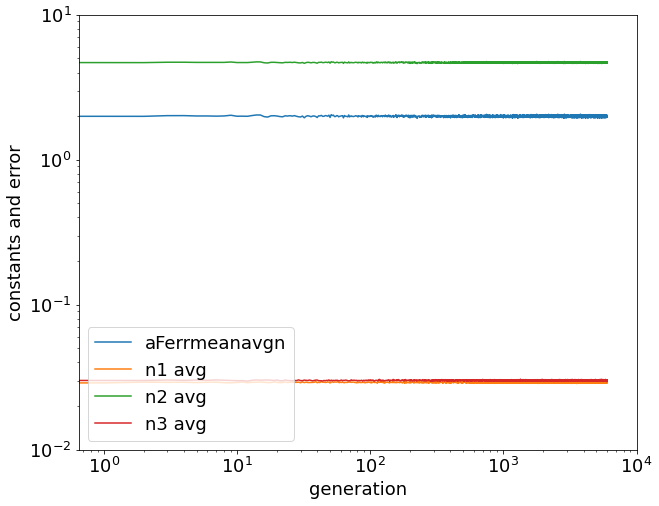

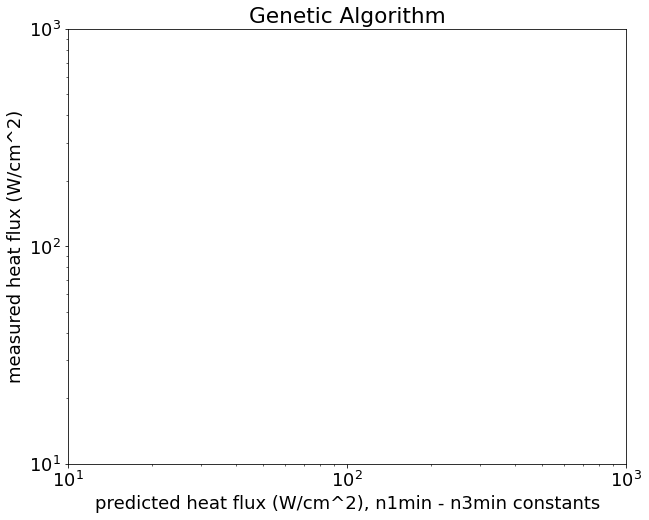

In [28]:

'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 45 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 45 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])
'''
ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])
'''
ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])
'''
ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])
'''
# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]
#set program parameters
# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)



#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()]]
for i in range(ND):
    n.append([-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    for i in range(ND):

        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] )

        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+MR*2.*(0.5-numpy.random.rand()))
        '''
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))
        '''
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] )

        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063' )
print('ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876')
print('MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072')
print('TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075\n')

print('Values from different initial guesses 3- where n1 = ', n1i, ', n2 = ', n2i, ', and n3 = ', n3i)
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta, '\n')

# compare minimum aFerrMeanMin
print('Initial aFerrmeanMin Value: 0.030753880388892072')
print('New aFerrmeanMin Value 3:', aFerrmeanavgnMin)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min)
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 


## Discussion regarding results from third change:

#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063
#### First Change: n<sub>1</sub> = 0.00029 | n<sub>2</sub> = 4.1 | n<sub>1</sub> = 0.067
#### Second Change Change: n<sub>1</sub> = 0.00024 | n<sub>2</sub> = 3.8 | n<sub>1</sub> = 0.059
#### Third Change Change: n<sub>1</sub> = 0.00020 | n<sub>2</sub> = 3.6 | n<sub>1</sub> = 0.051

---------------------------------
## Final Change to n<sub>1</sub>, n<sub>2</sub>, n<sub>3</sub>

#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063
#### Forth Change: n<sub>1</sub> = 0.00028 | n<sub>2</sub> = 3.9 | n<sub>1</sub> = 0.061



In [29]:
''' Initial Given Values
#Program Parameters
NGEN = 6000 # number of generations (steps)
MFRAC = 0.5 # faction of median threshold
MR = 0.09 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

#guesses for initial solution population
n0i = -1.0
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215
n5i = 0.145
'''

''' New Parameters 4 '''
#set program parameters
NGEN = 6000 #number of generations (steps)
MFRAC = 0.4 # fraction of median threshold
MR = 0.06 # mutation rate

#Pertubation Constants
PC1 = 0.001
PC2 = 0.1
PC3 = 0.0001
PC4 = 0.0001
PC5 = 0.0001

# First Different Initial guesses for initial solution population 
n0i = -1.0
n1i = 0.029 #Different 
n2i = 4.6  #Different
n3i = 0.03 #Different
n4i = 1.215
n5i = 0.145



Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063
ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876
MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072
TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075

Values from different initial guesses 4- where n1 =  0.029 , n2 =  4.6 , and n3 =  0.03
ENDING: pop. avg n1-n3,aFerrmean: 0.028998768022992075 4.644176628898744 0.0302429266691636 1.9629920909507512
MINUMUM: avg n1-n3,aFerrmeanMin: 0.028888631334464433 4.581013374321188 0.030239557464704515 1.9113690808123882
TIME AVG: avg n1-n3,aFerrmean: 0.02912992390565042 4.684119080554266 0.030068441728389295 1.9967597290488615 

Initial aFerrmeanMin Value: 0.030753880388892072
New aFerrmeanMin Value 4: 1.9113690808123882


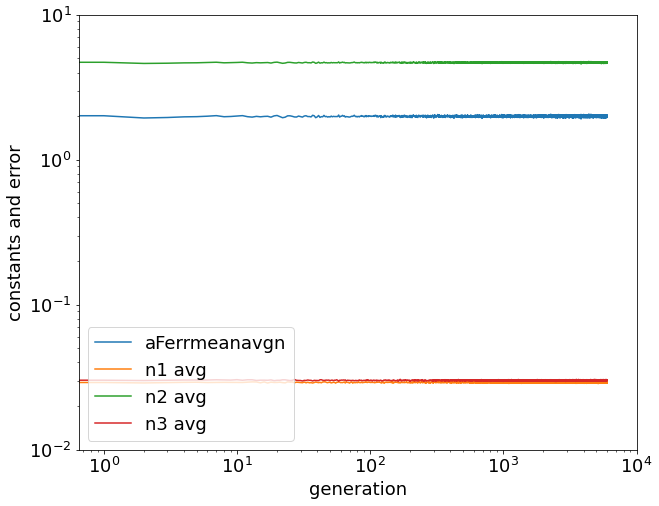

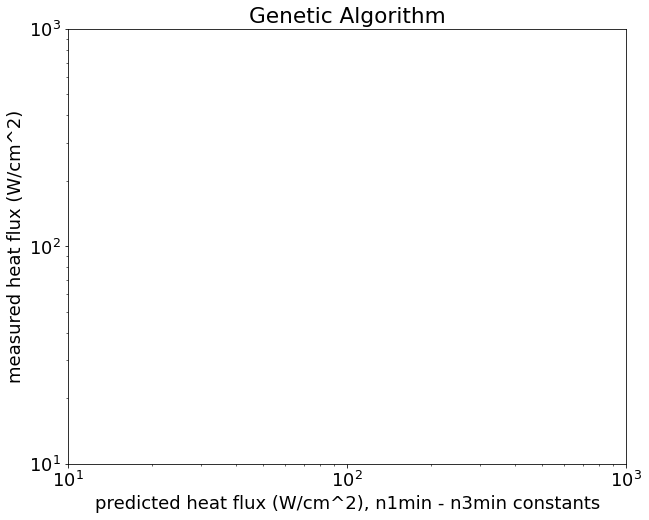

In [31]:

'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 45 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 45 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])
'''
ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])
'''
ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])
'''
ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])
'''
# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]
#set program parameters
# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)



#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()]]
for i in range(ND):
    n.append([-1., n1i+PC1*random(), n2i+PC2*random(), n3i+PC3*random(), n4i+PC4*random(), n5i+PC5*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    for i in range(ND):

        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] )

        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+MR*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+MR*2.*(0.5-numpy.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+MR*2.*(0.5-numpy.random.rand()))
        '''
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))
        '''
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] )

        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('Values from provided initial guesses where n1 = 0.00027, n2 = 4.0, and n3 = 0.063' )
print('ENDING: pop. avg n1-n3,aFerrmean: 0.0003794828000643582 3.3501499204387555 0.06534742538794072 0.0402572224631876')
print('MINUMUM: avg n1-n3,aFerrmeanMin: 0.0004342170032207275 3.34803821774222 0.05494103661240672 0.030753880388892072')
print('TIME AVG: avg n1-n3,aFerrmean: 0.00037011324026687523 3.3943620340546494 0.05914890089600846 0.036085206582139075\n')

print('Values from different initial guesses 4- where n1 = ', n1i, ', n2 = ', n2i, ', and n3 = ', n3i)
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta, '\n')

# compare minimum aFerrMeanMin
print('Initial aFerrmeanMin Value: 0.030753880388892072')
print('New aFerrmeanMin Value 4:', aFerrmeanavgnMin)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min)
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 


## Discussion regarding results from final change:
#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063 | Minimum Error = 0.030753880388892072
#### First Change: n<sub>1</sub> = 0.00029 | n<sub>2</sub> = 4.1 | n<sub>1</sub> = 0.067 | Minimum Error = 0.030142586772199213
#### Second Change Change: n<sub>1</sub> = 0.00024 | n<sub>2</sub> = 3.8 | n<sub>1</sub> = 0.059 | Minimum Error = 0.030109277660015112
#### Third Change Change: n<sub>1</sub> = 0.00020 | n<sub>2</sub> = 3.6 | n<sub>1</sub> = 0.051 | Minimum Error = 0.030905580504230822
#### Fourth Change Change: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 3.8 | n<sub>1</sub> = 0.067 | Minimum Error = 0.030225655516795222


---------------------------------
## Discussion Regarding All Changes: 

#### Original: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 4.0 | n<sub>1</sub> = 0.063 | Minimum Error = 0.030753880388892072
![generationPlotOne](data/taskTwo/generationPlotOne.JPG) ![LogPlotOne](data/taskTwo/logPlotOne.JPG)
#### First Change: n<sub>1</sub> = 0.00029 | n<sub>2</sub> = 4.1 | n<sub>1</sub> = 0.067 | Minimum Error = 0.030142586772199213
![generationPlotOne](data/taskTwo/generationPlotTwo.JPG) ![LogPlotOne](data/taskTwo/logPlotTwo.JPG)
#### Second Change Change: n<sub>1</sub> = 0.00024 | n<sub>2</sub> = 3.8 | n<sub>1</sub> = 0.059 | Minimum Error = 0.030109277660015112
![generationPlotOne](data/taskTwo/generationPlotThree.JPG) ![LogPlotOne](data/taskTwo/logPlotThree.JPG)
#### Third Change Change: n<sub>1</sub> = 0.00020 | n<sub>2</sub> = 3.6 | n<sub>1</sub> = 0.051 | Minimum Error = 0.030905580504230822
![generationPlotOne](data/taskTwo/generationPlotFour.JPG) ![LogPlotOne](data/taskTwo/logPlotFour.JPG)
#### Fourth Change Change: n<sub>1</sub> = 0.00027 | n<sub>2</sub> = 3.8 | n<sub>1</sub> = 0.067 | Minimum Error = 0.030225655516795222
![generationPlotOne](data/taskTwo/generationPlotFive.JPG) ![LogPlotOne](data/taskTwo/logPlotFive.JPG)







---------------------------------
## Task 3. 
### Determine n<sub>1</sub> through n<sub>5</sub> to best fit the data. Run for a range of initial guesses to be sure 
### you have a best fit (aFerrmeanavgnMin less than 0.03). Summarize the constants n<sub>1</sub> through n<sub>5</sub> for your
### best fit to the data in a table. Use the resulting curve-fit equation to create a surface plot of 
### q"/(Tw −Tsat)<sup>n2</sup> versus g and γ for 1.0 < g < 20 m/s<sup>2</sup> and 0.0 < γ < 2.0 at a pressure of 10 kPa.

ENDING: pop. avg n1-n3,aFerrmean: 0.0005675149900976724 2.979487529259793 0.2235573444478287 1.399204047548181 0.1583618275458698 0.03470305244271016
MINUMUM: avg n1-n3,aFerrmeanMin: 0.0005378922153402458 2.9122334302958315 0.30023577019460196 1.753182843499179 0.17364844619891442 0.028969585210913147
TIME AVG: avg n1-n3,aFerrmean: 0.0006181683009943458 2.9707103928730962 0.21400034296433817 1.4390410954780641 0.1666669724292543 0.03607434961356479


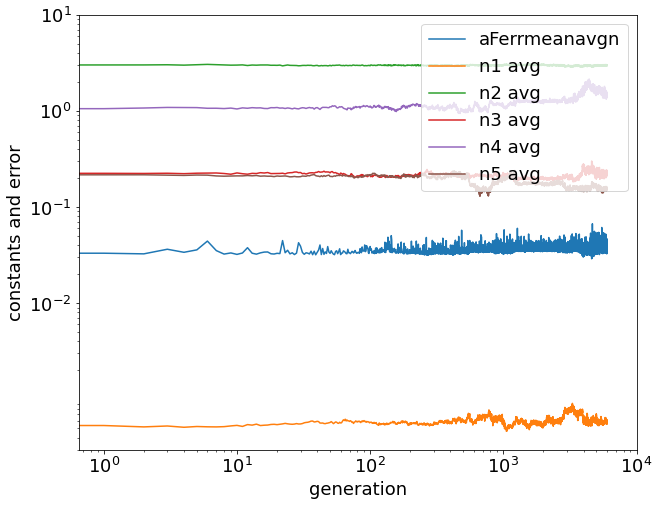

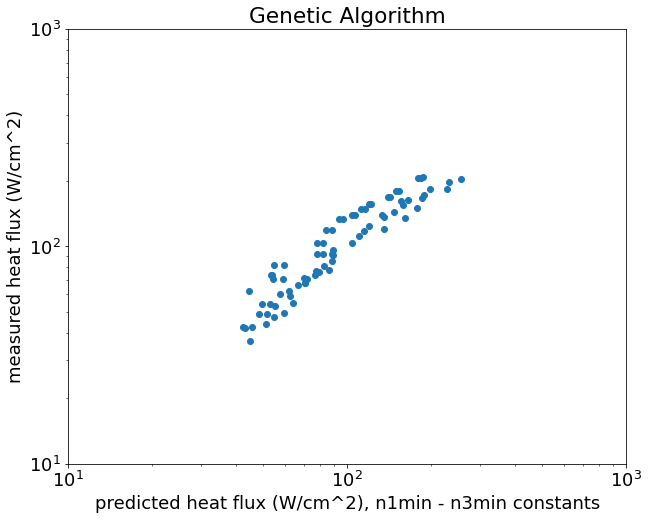

<function matplotlib.pyplot.show(close=None, block=None)>

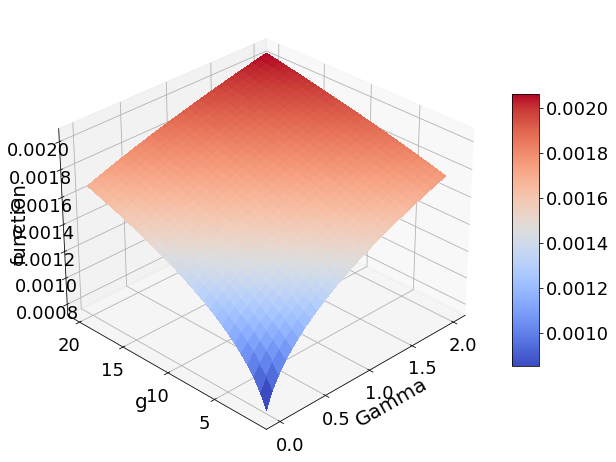

In [13]:
'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy as np

%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 77 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 77 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])

ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])

ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])

ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])

# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]
#set program parameters
NGEN = 6000 #number of generations (steps)
MFRAC = 0.5 # faction of median threshold
# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)

'''guesses for initial solution population'''
'''Edited for Task Three'''
n0i = -1.0
n1i = 0.000476
n2i = 3.028
n3i = 0.2249
n4i = 1.054
n5i = 0.217

#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    
    '''Edit for Task 3'''
    for i in range(ND):

        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] + n[i][4]*9.8*ydata[i][3]) # edited 
        Ferr[i] = Ferr[i] + n[i][5]*math.log(ydata[i][4]) # edited

        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = np.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = np.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = np.random.randint(low=0, high=nkeep+1)
        nmate2 = np.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))

        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))

        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
        
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))

        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
    
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    '''Edit for Task 3'''
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] + n4avg[k]*9.8*ydata[i][3]) #edited
        Ferravgn[i] = Ferravgn[i] + n5avg[k]*math.log(ydata[i][4]) #edited

        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = np.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], n5avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, n4min, n5min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, n4ta, n5ta, aFerrta)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
'''edit for Task 3'''
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2]+n4min*9.8*ydata[i][3])**n3min) * ((ydata[i][4])**n5min)
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
# plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
plt.plot(gen, n4avg)
plt.plot(gen, n5avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 

# creating a surface plot


#nValues = [.000463, 2.9903, 0.2731, 1.1391, 0.2051]
nValues = [.000463, 2.9903, 0.2731, 1.1391, 0.2051]

gamma = np.linspace( 0,2,60)
gplot = np.linspace(1,20,60)
function = np.zeros((len(gamma),len(gplot)))
for i in range(len(gamma)):
    for j in range(len(gplot)):
        function[j][i] = nValues[0]*((gplot[j]+nValues[3]*9.8*gamma[i])**nValues[2])*(10**nValues[4])
X,Y = np.meshgrid(gamma,gplot)
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_size_inches(10,10)

        
surf = ax.plot_surface(X, Y, function, cmap=plt.cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_xlabel(r'Gamma', fontsize=20)
ax.set_ylabel(r'g', fontsize = 20)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'function', fontsize = 20, rotation = 90)
fig.colorbar(surf,shrink=0.5,aspect=10)

ax.view_init(30,225)

plt.show

---
# Task Four

### Take the data used in Task 3 and convert it to the non-dimensional parameters suggested by the well-known
### Rohsenow correlation for nucleate boiling:


In [10]:
'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 77 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 77 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])

ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])

ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])

ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])


#making y data transform to 
# units corresponding to varying pressures
# Pressure = 5.5 kPa
iTsat = 34.9
icpl = 4.18
ihlv = 2418.0
iul = 7.19e-4
iPrl = 4.83
irhoL = 994.0
irhoV  = 0.0397
isigma = 0.0706

# Pressure = 7.0 kPa
jsat = 38.0
jcpl = 4.18
jhlv = 2406
jul = 6.53e-4
jPrl = 4.54
jrhoL = 993.0
jrhoV  = 0.0476
jsigma = 0.0692

# Pressure = 7.0 kPa
ksat = 45.0
kcpl = 4.18
khlv = 2394
kul = 5.96e-4
kPrl = 3.91
krhoL = 990.0
krhoV  = 0.182
ksigma = 0.0688

for i in range(len(ydata)):
    if ydata[i][4] == 5.5:
        ydata[i][0] = (8 * (ydata[i][0]/((iul)*ihlv)))*math.sqrt(isigma/(9.8*(irhoL-irhoV)))
        ydata[i][1] = 100*((icpl*ydata[i][1])/ihlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = iPrl
    elif ydata[i][4] == 7.0:
        ydata[i][0] = (8 * (ydata[i][0]/((jul)*jhlv)))*math.sqrt(jsigma/(9.8*(jrhoL-jrhoV)))
        ydata[i][1] = 100*((jcpl*ydata[i][1])/jhlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = jPrl
    elif ydata[i][4] == 9.5:
        ydata[i][0] = (8 * (ydata[i][0]/((kul)*khlv)))*math.sqrt(ksigma/(9.8*(krhoL-krhoV)))
        ydata[i][1] = 100*((kcpl*ydata[i][1])/khlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = kPrl       
            

# print the data array
print ('ydata =', ydata)




ydata = [[0.5463213627095972, 5.618279569892473, 0.01, 1.79, 4.83], [0.5872025531164378, 5.739288668320927, 0.01, 1.79, 4.83], [0.6119790321508867, 5.912158808933002, 0.01, 1.79, 4.83], [0.733383779419686, 6.015880893300247, 0.01, 1.79, 4.83], [0.8399226392678161, 6.275186104218361, 0.01, 1.79, 4.83], [0.9117744284677176, 6.448056244830439, 0.01, 1.79, 4.83], [0.9452226751642236, 6.534491315136476, 0.01, 1.79, 4.83], [1.0567168308192436, 6.776509511993383, 0.01, 1.79, 4.83], [1.1954651134121572, 6.79379652605459, 0.01, 1.79, 4.83], [1.3750945864119113, 7.312406947890818, 0.01, 1.79, 4.83], [1.5361417001358288, 7.5198511166253095, 0.01, 1.79, 4.83], [1.6872782222459668, 7.848304383788254, 0.01, 1.79, 4.83], [1.777712370721705, 8.073035566583952, 0.01, 1.79, 4.83], [1.9152218293628962, 8.280479735318444, 0.01, 1.79, 4.83], [2.0205218652593038, 8.401488833746898, 0.01, 1.79, 4.83], [2.140687788576381, 8.799090157154673, 0.01, 1.79, 4.83], [2.281913719072739, 8.937386269644335, 0.01, 1.79,

## Task 5.A
### Make a copy of the five-constant raw data code program developed in Task 3, and make appropriate
### changes to it so it will use the genetic algorithm to determine the set of constants n1 through n5 in the
### performance equation (14) that provide a best fit to the dimensionless data set developed in Task 4.
### Summarize the constants n1 through n5 for your best fit to the data in a table. Construct a log-log plot with the 
### measured Qs,exp values as the vertical axis and predicted Qs,pred values obtained using Eq. (14) with your
### best-fit constants. Be sure to plot the combinations of (Qs,pred , Qs,exp ) as discrete points. Also determine the
### rms deviation of the Qs,exp data from the Qs,pred predictions. 

ENDING: pop. avg n1-n5,aFerrmean: 0.0007645375684966977 4.126891291947435 0.01599144278975619 0.16111444581232529 0.1100211619936595 1.8123816335056835
MINUMUM: avg n1-n5,aFerrmeanMin: 0.000844648537402037 4.127383530803977 0.017519996654062103 0.17496576920015963 0.10937176097167027 1.702680124018652
TIME AVG: avg n1-n5,aFerrmean: 0.000739388750931785 4.155198855938952 0.016726550585997865 0.18918616211267467 0.1252456085646782 3.1800796194656797


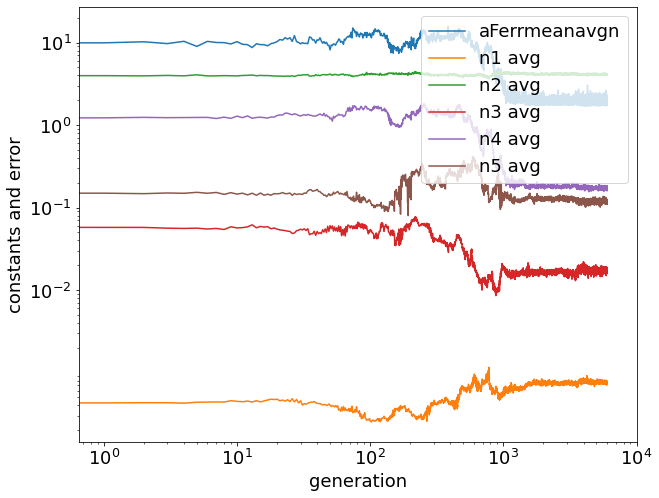

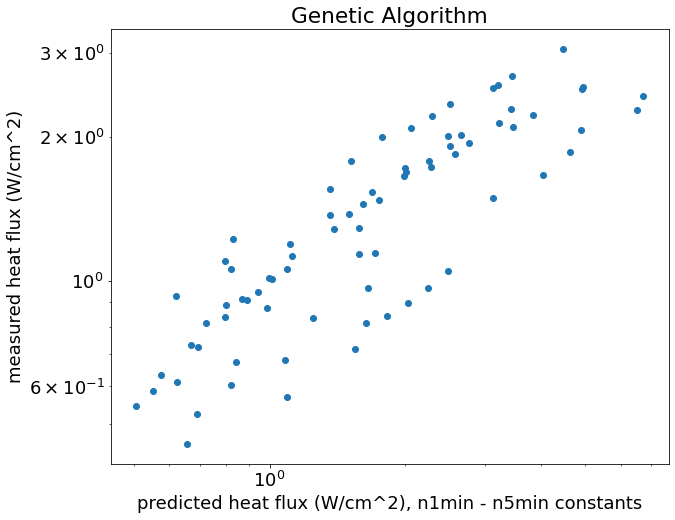

In [38]:
'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 77 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 77 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])

ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])

ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])

ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])


#making y data transform to 
# units corresponding to varying pressures
# Pressure = 5.5 kPa
iTsat = 34.9
icpl = 4.18
ihlv = 2418.0
iul = 7.19e-4
iPrl = 4.83
irhoL = 994.0
irhoV  = 0.0397
isigma = 0.0706

# Pressure = 7.0 kPa
jsat = 38.0
jcpl = 4.18
jhlv = 2406
jul = 6.53e-4
jPrl = 4.54
jrhoL = 993.0
jrhoV  = 0.0476
jsigma = 0.0692

# Pressure = 7.0 kPa
ksat = 45.0
kcpl = 4.18
khlv = 2394
kul = 5.96e-4
kPrl = 3.91
krhoL = 990.0
krhoV  = 0.182
ksigma = 0.0688

for i in range(len(ydata)):
    if ydata[i][4] == 5.5:
        ydata[i][0] = (8 * (ydata[i][0]/((iul)*ihlv)))*math.sqrt(isigma/(9.8*(irhoL-irhoV)))
        ydata[i][1] = 100*((icpl*ydata[i][1])/ihlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = iPrl
    elif ydata[i][4] == 7.0:
        ydata[i][0] = (8 * (ydata[i][0]/((jul)*jhlv)))*math.sqrt(jsigma/(9.8*(jrhoL-jrhoV)))
        ydata[i][1] = 100*((jcpl*ydata[i][1])/jhlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = jPrl
    elif ydata[i][4] == 9.5:
        ydata[i][0] = (8 * (ydata[i][0]/((kul)*khlv)))*math.sqrt(ksigma/(9.8*(krhoL-krhoV)))
        ydata[i][1] = 100*((kcpl*ydata[i][1])/khlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = kPrl       
            

# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]
#set program parameters
NGEN = 6000 #number of generations (steps)
MFRAC = 0.2 # faction of median threshold
# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)

'''guesses for initial solution population

n0i = -1.0
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215
n5i = 0.145 

n0i = -1.0
n1i = 0.000476
n2i = 3.028
n3i = 0.2249
n4i = 1.054
n5i = 0.217

n0i = -1.0
n1i = 0.000463
n2i = 2.9903
n3i = 0.2731
n4i = 1.1391
n5i = 0.2051


n0i = -1.0
n1i = 0.000463
n2i = 2.9903
n3i = 0.2731
n4i = 1.1391
n5i = 0.2051
'''
'''
trial 1
n0i = -1.0
n1i = 0.00038
n2i = 4.0
n3i = 0.058
n4i = 1.2165
n5i = 0.150
trial 2
n0i = -1.0
n1i = 0.00032
n2i = 4.15
n3i = 0.061
n4i = 1.214
n5i = 0.140
trial 3
n0i = -1.0
n1i = 0.00037
n2i = 4.1
n3i = 0.060
n4i = 1.2163
n5i = 0.156
'''
n0i = -1.0
n1i = 0.00038
n2i = 4.0
n3i = 0.058
n4i = 1.2165
n5i = 0.150


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    
    '''Edit for Task 3'''
    for i in range(ND):
        ''' Replaced with new Equation 
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] + n[i][4]*9.8*ydata[i][3]) # edited 
        Ferr[i] = Ferr[i] + n[i][5]*math.log(ydata[i][4]) # edited
        '''
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*math.log(ydata[i][1]) 
        Ferr[i] = Ferr[i] + n[i][4]*math.log(ydata[i][2] + n[i][3]*ydata[i][3])
        Ferr[i] = Ferr[i] - n[i][5]*math.log(ydata[i][4])

        
        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-numpy.random.rand()))
        
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))
    
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    '''Edit for Task 3'''
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n4avg[k]*math.log(ydata[i][2] + n3avg[k]*ydata[i][3]) #edited
        Ferravgn[i] = Ferravgn[i] - n5avg[k]*math.log(ydata[i][4]) #edited


 

        
        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n5,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], n5avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n5,aFerrmeanMin:', n1min, n2min, n3min, n4min, n5min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n5,aFerrmean:', n1ta, n2ta, n3ta, n4ta, n5ta, aFerrta)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
'''edit for Task 3'''
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2]+n3min*ydata[i][3])**n4min) * ((ydata[i][4])**(-1*n5min))
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
# plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
plt.plot(gen, n4avg)
plt.plot(gen, n5avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n5min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 


## Task 5.B
### Rearrange Eq. (14) and solve it for Qs Prl
### n5 / Jas n2 as a function of g / gen and γ . Use the resulting relation
### to construct as surface plot of Qs Prl n5 / Jas n2 for 0.01≤ g / gen ≤ 2 
### and 0.001≤ γ ≤ 2 with both the g / genaxis and the γ axis are logarithmic.

ENDING: pop. avg n1-n5,aFerrmean: 0.00027551537911338895 4.654038822290485 0.15817691667818456 0.36682929782805007 0.20909939770226527 2.062098180423334
MINUMUM: avg n1-n5,aFerrmeanMin: 0.000290026144646327 4.701651622237984 0.17683615791906965 0.3795523468762988 0.20659795933013173 1.7550199557103117
TIME AVG: avg n1-n5,aFerrmean: 0.00027882590310244565 4.679080574117409 0.15900745578209788 0.3686062846411089 0.21123676913119052 2.2016462519846263


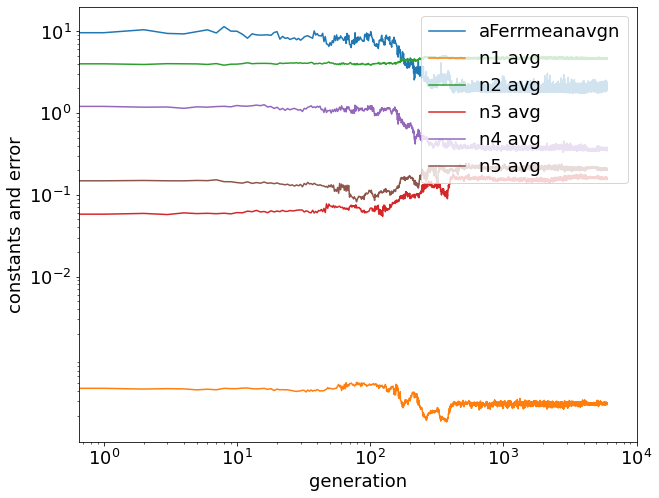

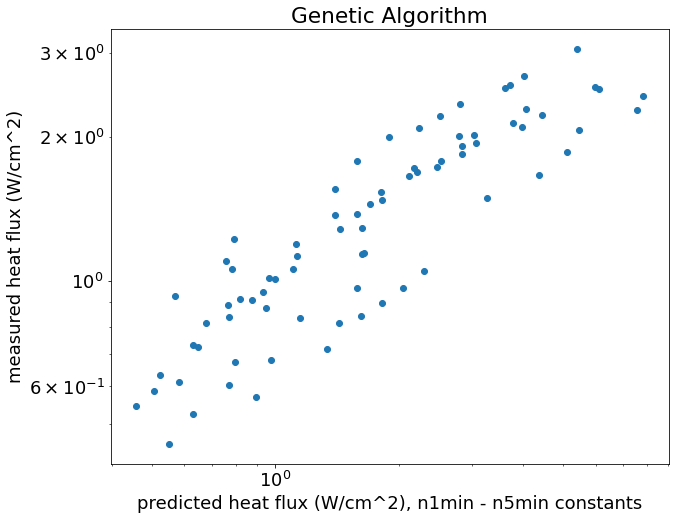

<function matplotlib.pyplot.show(close=None, block=None)>

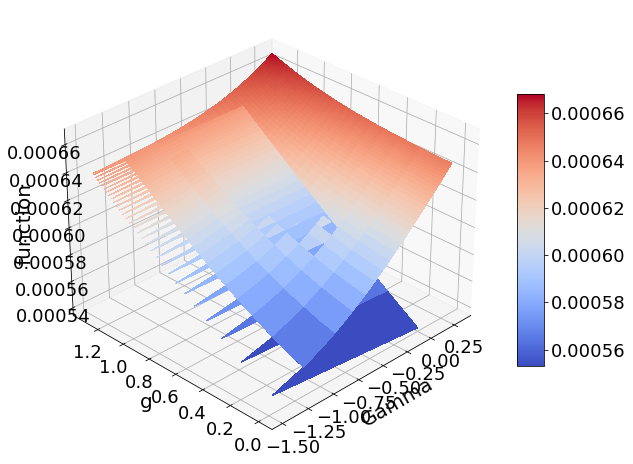

In [43]:
'''>>>>> start CodeP1.1F22
V.P. Carey ME249, Fall 2022'''
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas
#import copy
from copy import copy, deepcopy
#create arrays
ydata = []
lydata = []
#Parameters for Evolution Loop
#set data parameters
ND = 77 #number of data vectors in array
DI = 5 #number of data items in vector
NS = 77 #total number of DNA strands

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors
#[heat flux, superheat, gravity, surface tension parameter, pressure]

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])
ydata.append([59.2, 34.8, 0.098, 1.79, 5.5])
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5])
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5])
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5])
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5])
ydata.append([124., 43.5, 0.098, 1.79, 5.5])
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])
ydata.append([143.5, 46.7, 0.098, 1.79, 5.5])
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5])
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5])
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])
ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])

ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])

ydata.append([42.4, 28.0, 19.6, 1.79, 9.5])
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5])
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])
ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])

ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])

ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])
ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])


#making y data transform to 
# units corresponding to varying pressures
# Pressure = 5.5 kPa
iTsat = 34.9
icpl = 4.18
ihlv = 2418.0
iul = 7.19e-4
iPrl = 4.83
irhoL = 994.0
irhoV  = 0.0397
isigma = 0.0706

# Pressure = 7.0 kPa
jsat = 38.0
jcpl = 4.18
jhlv = 2406
jul = 6.53e-4
jPrl = 4.54
jrhoL = 993.0
jrhoV  = 0.0476
jsigma = 0.0692

# Pressure = 7.0 kPa
ksat = 45.0
kcpl = 4.18
khlv = 2394
kul = 5.96e-4
kPrl = 3.91
krhoL = 990.0
krhoV  = 0.182
ksigma = 0.0688

for i in range(len(ydata)):
    if ydata[i][4] == 5.5:
        ydata[i][0] = (8 * (ydata[i][0]/((iul)*ihlv)))*math.sqrt(isigma/(9.8*(irhoL-irhoV)))
        ydata[i][1] = 100*((icpl*ydata[i][1])/ihlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = iPrl
    elif ydata[i][4] == 7.0:
        ydata[i][0] = (8 * (ydata[i][0]/((jul)*jhlv)))*math.sqrt(jsigma/(9.8*(jrhoL-jrhoV)))
        ydata[i][1] = 100*((jcpl*ydata[i][1])/jhlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = jPrl
    elif ydata[i][4] == 9.5:
        ydata[i][0] = (8 * (ydata[i][0]/((kul)*khlv)))*math.sqrt(ksigma/(9.8*(krhoL-krhoV)))
        ydata[i][1] = 100*((kcpl*ydata[i][1])/khlv)
        ydata[i][2] = ydata[i][2] / 9.8
        ydata[i][4] = kPrl       
            

# print the data array
# print ('ydata =', ydata)


''' need deepcopy to create an array of the same size as ydata,
# since this array is a list(rows) of lists (column entries) '''
lydata = deepcopy(ydata) # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is: ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)
#OK now have stored array of log values for data
#end CodeP1.1F21

'''>>>>> start CodeP1.2F22
 V.P. Carey ME249, Fall 2022'''
'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0]
#set program parameters
NGEN = 6000 #number of generations (steps)
MFRAC = 0.2 # faction of median threshold
# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1) # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)

'''guesses for initial solution population

n0i = -1.0
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215
n5i = 0.145 

n0i = -1.0
n1i = 0.000476
n2i = 3.028
n3i = 0.2249
n4i = 1.054
n5i = 0.217

n0i = -1.0
n1i = 0.000463
n2i = 2.9903
n3i = 0.2731
n4i = 1.1391
n5i = 0.2051


n0i = -1.0
n1i = 0.000463
n2i = 2.9903
n3i = 0.2731
n4i = 1.1391
n5i = 0.2051
'''
'''
trial 1
n0i = -1.0
n1i = 0.00038
n2i = 4.0
n3i = 0.058
n4i = 1.2165
n5i = 0.150
trial 2
n0i = -1.0
n1i = 0.00032
n2i = 4.15
n3i = 0.061
n4i = 1.214
n5i = 0.140
trial 3
n0i = -1.0
n1i = 0.00037
n2i = 4.1
n3i = 0.060
n4i = 1.2163
n5i = 0.156
'''
n0i = -1.0
n1i = 0.00038
n2i = 4.0
n3i = 0.058
n4i = 1.2165
n5i = 0.150


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5
#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n = [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr = [[0.0]]
#population average solution error and absoute error
Ferravgn = [[0.0]]
aFerr = [[0.0]]
aFerravgn = [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0
# these store the n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0


'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED

for k in range(NGEN):

    '''In this program , the number of organisms (solutions) NS is taken to be equal to the
    number of data points ND so for each generation, each solution can be compared to a different
    data point and all the data is compared in each generation. The order of the solutions in the array
    that holds the solution constants is constantly changing due to mating and selection, so the pairing
    is random.'''


    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is
    used to evaluate fitness.'''

    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    
    '''Edit for Task 3'''
    for i in range(ND):
        ''' Replaced with new Equation 
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] + n[i][4]*9.8*ydata[i][3]) # edited 
        Ferr[i] = Ferr[i] + n[i][5]*math.log(ydata[i][4]) # edited
        '''
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*math.log(ydata[i][1]) 
        Ferr[i] = Ferr[i] + n[i][4]*math.log(ydata[i][2] + n[i][3]*ydata[i][3])
        Ferr[i] = Ferr[i] - n[i][5]*math.log(ydata[i][4])

        
        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0]) #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation
    '''SELECTION'''
    #pick survivors
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0

    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS): # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep

    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew):
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)

        #then randomly pick DNA from parents for offspring

        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (numpy.random.rand() < 0.5)
        # ntemp[nkeep+j+1][0] = n[nmate1][0]
        #else
        # ntemp[nkeep+j+1][0] = n[nmate2][0]

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-numpy.random.rand()))
        
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))

        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-numpy.random.rand())) # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))
    
     #=============================================
    n = deepcopy(ntemp) # save ntemp as n for use in next generation (next iteration)


    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions)
    # at this generation k
    #=============================================
    #initialoze average n's to zero and sum contribution of each member of the solution population
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):
        n1avg[k] = n1avg[k] + n[j][1]/NS;
        n2avg[k] = n2avg[k] + n[j][2]/NS;
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;
    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    #
    #=============================================
    '''Edit for Task 3'''
    for i in range(ND):
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n4avg[k]*math.log(ydata[i][2] + n3avg[k]*ydata[i][3]) #edited
        Ferravgn[i] = Ferravgn[i] - n5avg[k]*math.log(ydata[i][4]) #edited


 

        
        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)


    # next, update time average of n valaues in population (n1ta[k], etc.)
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)

    # compare aFerrmeanavgn[k] to previous minimum value and save
    # it and corresponding n(i) values if the value for this generation k is lower
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k]
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]

    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------

# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n5,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], n5avg[k], aFerrmeanavgn[k])
print('MINUMUM: avg n1-n5,aFerrmeanMin:', n1min, n2min, n3min, n4min, n5min, aFerrmeanavgnMin)
print('TIME AVG: avg n1-n5,aFerrmean:', n1ta, n2ta, n3ta, n4ta, n5ta, aFerrta)

#SETTING UP PLOTS

#========

#initialize values
qpppred = [[0.0]]
qppdata = [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])
#calculate predicted and data values to plot
'''edit for Task 3'''
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2]+n3min*ydata[i][3])**n4min) * ((ydata[i][4])**(-1*n5min))
    qppdata[i] = ydata[i][0]

#========
# constants evolution plots
# x axis values are generation number
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points
plt.rcParams.update({'font.size': 18})
# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn)
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
# plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
plt.plot(gen, n4avg)
plt.plot(gen, n5avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis
plt.xlabel('generation')
# naming the y axis
plt.ylabel('constants and error')
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000])
plt.show()

# data vs. predicted heat flux plot
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n5min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()

# end CodeP1.2F22 

# creating a surface plot

#nValues = [.000463, 2.9903, 0.2731, 1.1391, 0.2051]
nValues = [.00038, 4.0, 0.058, 1.2165, 0.150]

gamma = np.linspace( 0,2,60)
gplot = np.linspace(1,20,60)
function = np.zeros((len(gamma),len(gplot)))
for i in range(len(gamma)):
    for j in range(len(gplot)):
        function[j][i] = nValues[0]*((gplot[j]+nValues[3]*9.8*gamma[i])**nValues[2])*(10**nValues[4])
X,Y = np.meshgrid(gamma,gplot)
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_size_inches(10,10)
X[X != 0] = np.log10(X[X != 0])
Y[Y != 0] = np.log10(Y[Y != 0])       
surf = ax.plot_surface(X, Y, function, cmap=plt.cm.coolwarm, linewidth = 0.5, antialiased = False)

ax.set_xlabel(r'Gamma', fontsize=20)
ax.set_ylabel(r'g', fontsize = 20)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'function', fontsize = 20, rotation = 90)
fig.colorbar(surf,shrink=0.5,aspect=10)

ax.view_init(30,225)

plt.show

# Task 5.C
### The table at the end of this write-up lists a collection of randomly sampled validation data (in blue) that are
### not included in the data sets provided to train the model relations using the genetic algorithms. Use Eq. (14)
### with constants n1,n2 ,n3,n4 ,n5 for your best fit to the data to predict the heat flux for each of the validation
### data point conditions, and create a log-log plot with the measured heat flux values as the vertical axis and
### predicted heat flux values from Eq. (14). Be sure to plot the combinations of ( qʹʹpred , qʹʹexp ) as discrete 
### points.Also, determine and report the rms deviation of the qʹʹexp data from the qʹʹpred predictions. 

# Task Six